# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/emails.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(5172, 3002)

In [ ]:
df = df.drop(['Email No.'], axis=1)

In [ ]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.


In [ ]:
df_1 = df.groupby('Prediction')
df_1.first()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_1.Prediction.value_counts()

Prediction  Prediction
0           0             3672
1           1             1500
Name: Prediction, dtype: int64

## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english')), print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(None, None)

In [ ]:
df = df.drop(['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'as', 'from', 'or', 'not', 'me', 'if', 're', 'any', 'our', 'can', 'd', 'all', 'has', 'was', 'an', 't', 'up', 'should', 'do', 'am', 'out', 'no', 'there', 'but', 'been', 'these', 'so', 'm', 'into', 'they', 'my', 'what', 'only', 'which', 'more', 'about', 'now', 'their', 'some', 'just', 'other', 'here', 'when', 'over', 'them', 'below', 'o', 'he', 'were', 'who', 'don', 'its', 'through', 'had', 'she', 'how', 'being', 'under', 'than', 'off', 'after', 'each', 'll', 'did', 'before', 'then', 'his', 'same', 'does', 'above', 'those', 'down', 'very', 'her', 'such', 'again', 'both', 've', 'until', 'because', 'where', 'further', 'most', 'between', 'own', 'once', 'while', 'during', 'why', 'him', 'few', 'y', 'too', 'having', 'doing', 'didn', 'yourself', 'doesn', 'won', 'against', 'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself', 'ma', 'aren'], axis=1)
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
features = df.columns

list = []
for i in features:
  if i in stopwords.words('english'):
    list.append(i)
print(list)

[]


In [ ]:
features = df.columns

list_2 = []
for i in features:
  if i not in stopwords.words('english'):
    list_2.append(i)
print(list_2)

['ect', 'hou', 'enron', 'com', 'gas', 'deal', 'meter', 'hpl', 'please', 'e', 'corp', 'know', 'need', 'forwarded', 'new', 'may', 'j', 'mmbtu', 'get', 'see', 'price', 'daren', 'company', 'l', 'let', 'would', 'xls', 'farmer', 'attached', 'us', 'information', 'message', 'day', 'time', 'one', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'also', 'call', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'back', 'want', 'original', 'ticket', 'c', 'could', 'make', 'inc', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'system', 'april', 'number', 'sale', 'first', 'thanks', 'business', 'help', 'per', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'go', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'well', 'tenaska', 'take', 'june', 'x', 'within', 'nbsp', 'north', 'ameri

## Train - Test Split

In [ ]:
# Create trianing and testing data

In [ ]:
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_2 = df.loc[:, df.columns.drop(['Prediction'])]
df_2.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2,df.Prediction, test_size=0.25)

## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
model.score(X_test,y_test)

0.9396751740139211

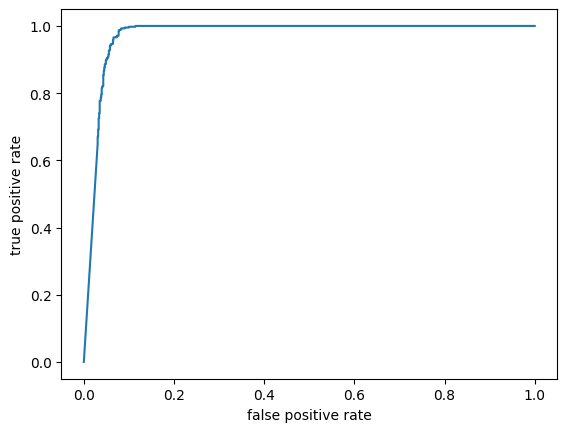

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

## Plot the confusion Matrix

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.classes_

array([0, 1])

In [ ]:
 # Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train,y_train)

SVC()

In [ ]:
model_2.score(X_test,y_test)

0.7749419953596288

## Comparing the models

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

Among both the models, NB classifier model has better accuracy around 94% where the model that used SV classifier had accuracy just around 78%. Hence the former model had better performance than the later one.
NB treats the features as independent whereas SVM classifiers lookks at the interactions between the features to a certain degree and this coulde be the reason for NB classifier to have better performance than SVC.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [ ]:
str = "I am a Python developer and currently working on a project to classify mails"
words = str.split(" ") # splitting the string to create a list of words
x = {}  # initiaising accumlator dictionary using variable x for easy code...

for word in words :
  if word not in x:
    x[word] = 0
  x[word] = x[word] + 1

freq_words = x

In [ ]:
x

{'I': 1,
 'am': 1,
 'a': 2,
 'Python': 1,
 'developer': 1,
 'and': 1,
 'currently': 1,
 'working': 1,
 'on': 1,
 'project': 1,
 'to': 1,
 'classify': 1,
 'mails': 1}

In [ ]:
lisst = []
for i in range(1,14):
  lisst.append(i)

lisst

df_bonus = pd.DataFrame(x, index = lisst)

In [ ]:
df_bonus.head()

,I,am,a,Python,developer,and,currently,working,on,project,to,classify,mails
1,1,1,2,1,1,1,1,1,1,1,1,1,1
2,1,1,2,1,1,1,1,1,1,1,1,1,1
3,1,1,2,1,1,1,1,1,1,1,1,1,1
4,1,1,2,1,1,1,1,1,1,1,1,1,1
5,1,1,2,1,1,1,1,1,1,1,1,1,1
